In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=740139d0810b1f71f6747980868be606155814064c356430630163c9f4761e90
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [2]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

24-12-23 09:19:08 - Directory /root/.deepface has been created
24-12-23 09:19:08 - Directory /root/.deepface/weights has been created


In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Initialize a counter to generate unique filenames
photo_counter = 1

def take_photo(quality=0.8):
    global photo_counter  # Use the counter to track photo numbering
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])

    # Create a unique filename
    filename = f'photo{photo_counter}.jpg'
    photo_counter += 1  # Increment the counter for the next photo

    # Save the photo
    with open(filename, 'wb') as f:
        f.write(binary)

    print(f"Photo saved as {filename}")
    return filename


In [4]:
def analyze_face(image_path):
    """Analyzes the captured image using DeepFace."""
    try:
        # Save the captured image temporarily
        image = cv2.imread(image_path)
        # cv2.imwrite(temp_image_path, image)

        # Perform analysis
        print("Analyzing the face...")
        analysis = DeepFace.analyze(image, actions=['age', 'gender', 'race', 'emotion'])
        print("Analysis Complete.")
        return image, analysis
    except Exception as e:
        print(f"Error during analysis: {e}")
        return None,None

In [14]:
def draw_boxes(image, analysis):
    """Draws bounding boxes around detected faces and adds titles."""
    if isinstance(analysis, list):
        for i, face in enumerate(analysis, start=1):
            region = face['region']
            x, y, w, h = region['x'], region['y'], region['w'], region['h']
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, f"face_{i}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    else:
        region = analysis['region']
        x, y, w, h = region['x'], region['y'], region['w'], region['h']
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, "face_1", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    return image

In [12]:
def display_results(image, analysis):
    """Displays the image and analysis results."""
    # Draw bounding boxes on the image
    image_with_boxes = draw_boxes(image.copy(), analysis)

    # Display the captured image with boxes
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Captured Image with Face Bounding Box")
    plt.show()

    # Print the analysis results
    if isinstance(analysis, list):
        for i, result in enumerate(analysis, start=1):
            print(f"\nFace {i}:")
            for key, value in result.items():
                print(f"{key.capitalize()}: {value}")
    else:
        print("\n--- Face Analysis Results ---")
        for key, value in analysis.items():
            print(f"{key.capitalize()}: {value}")

<IPython.core.display.Javascript object>

Photo saved as photo6.jpg
Analyzing the face...


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


Analysis Complete.


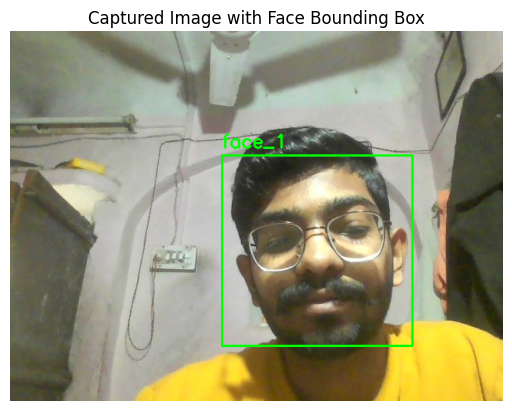


Face 1:
Age: 36
Region: {'x': 275, 'y': 161, 'w': 247, 'h': 247, 'left_eye': None, 'right_eye': None}
Face_confidence: 0.92
Gender: {'Woman': 0.8909913711249828, 'Man': 99.10900592803955}
Dominant_gender: Man
Race: {'asian': 4.397212976051151, 'indian': 37.72521541864964, 'black': 8.943197664213042, 'white': 8.431256319955368, 'middle eastern': 12.671042243900432, 'latino hispanic': 27.832074632172265}
Dominant_race: indian
Emotion: {'angry': 0.0009566048671475863, 'disgust': 1.110192028079869e-07, 'fear': 0.0010469051292421236, 'happy': 99.97269511548339, 'sad': 0.002301045331839656, 'surprise': 0.0004693637388114039, 'neutral': 0.022528610358795033}
Dominant_emotion: happy


In [19]:
if __name__ == "__main__":
    # Step 1: Capture photo
    captured_image_path = take_photo()
    if captured_image_path is not None:
        # Step 2: Analyze face
        image, face_analysis = analyze_face(captured_image_path)

        # Step 3: Display results
        if face_analysis is not None:
            display_results(image , face_analysis)


In [7]:
# add ui using gradio


Add Gradio ui


In [8]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [24]:
import gradio as gr


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace
import gradio as gr

# Function to analyze faces using DeepFace
def analyze_faces(image):
    try:
        # Perform face analysis
        analysis = DeepFace.analyze(image, actions=['age', 'gender', 'race', 'emotion'], enforce_detection=False)

        # Convert image to RGB for display
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = []

        # Check if analysis is a list (multiple faces detected)
        if isinstance(analysis, list):
            for i, face in enumerate(analysis):
                box = face['region']
                x, y, w, h = box['x'], box['y'], box['w'], box['h']
                cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(image_rgb, f"Face_{i + 1}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                results.append(face)
        else:
            box = analysis['region']
            x, y, w, h = box['x'], box['y'], box['w'], box['h']
            cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image_rgb, "Face_1", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            results.append(analysis)

        return image_rgb, results
    except Exception as e:
        return None, str(e)

# Function to handle Gradio inputs
def process_image(input_image):
    # Convert Gradio image input to OpenCV format
    image = cv2.cvtColor(np.array(input_image), cv2.COLOR_RGB2BGR)

    # Analyze the image
    analyzed_image, results = analyze_faces(image)

    if analyzed_image is None:
        return None, f"Error: {results}"

    # Prepare results text
    result_text = "\n".join([
        f"Face {i + 1}: Age: {res['age']}, Gender: {res['dominant_gender']}, Race: {res['dominant_race']}, Emotion: {res['dominant_emotion']}"
        for i, res in enumerate(results)
    ])

    # Return the image with bounding boxes and the analysis results
    return analyzed_image, result_text

# Gradio Interface
def create_ui():
    iface = gr.Interface(
        fn=process_image,
        inputs=gr.Image(type="pil", label="Upload an Image"),
        outputs=[
            gr.Image(type="numpy", label="Analyzed Image"),
            gr.Textbox(label="Face Analysis Results")
        ],
        title="DeepFace Face Analysis",
        description="Upload an image to detect faces and analyze age, gender, race, and emotion."
    )
    return iface

if __name__ == "__main__":
    # Launch Gradio interface
    ui = create_ui()
    ui.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a6c43ac714b3853b14.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# New section